In [1]:
import matplotlib.pyplot as plt
import numpy as np

import data_handling
import utils
from gaussian_spectral_clustering import (compute_pcs_and_project,
                                          initial_class_assignment,
                                          iterate_clustering,
                                          compute_class_statistics,
                                          compute_posterior_probability_and_assign,
                                          compute_multivariate_gaussian_statistics
                                         )
%matplotlib inline

In [2]:
# matplotlib settings for figure size and colormap
plt.rcParams['figure.figsize'] = [20, 15];
plt.rcParams['image.cmap'] = plt.gray();

<Figure size 1440x1080 with 0 Axes>

In [3]:
hsi_data_mat, sz, truth_data_mat = data_handling.load_aviris_data('sample-data-master/92AV3C.lan')

## Compute PCs and Project

In [4]:
x_pca, eig_vecs = compute_pcs_and_project(hsi_data_mat)

In [5]:
def reshape_pca_band(X, band, sz):
    nl, ns, nb = sz
    # return X.transpose().reshape([nl, ns, nb], order='F')[:, :, band]
    return X[band, :].reshape([nl, ns], order='F')

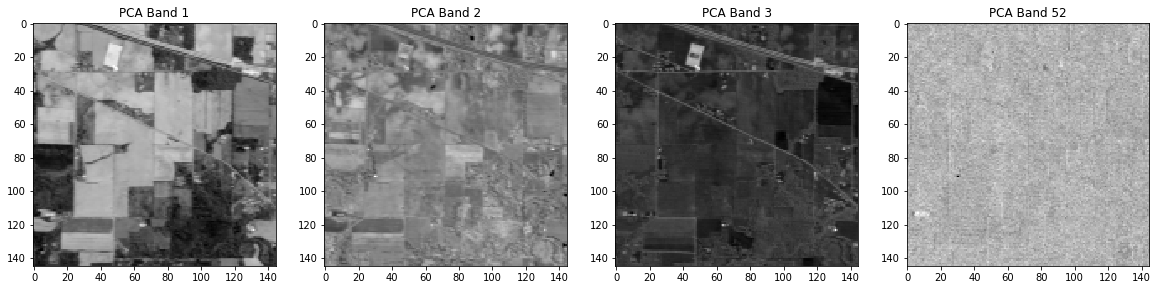

In [6]:
# Plot various bands from the image
# Squeeze() is needed to remove the single-dimensional band dimension
# before plotting (e.g. (nl, ns, 1) -> (nl, ns))
f, (plot1, plot2, plot3, plot4) = plt.subplots(1, 4)
plot1.imshow(reshape_pca_band(x_pca, 0, sz), cmap=plt.gray());
plot1.set_title('PCA Band 1');

plot2.imshow(reshape_pca_band(x_pca, 1, sz), cmap=plt.gray());
plot2.set_title('PCA Band 2');

plot3.imshow(reshape_pca_band(x_pca, 2, sz), cmap=plt.gray());
plot3.set_title('PCA Band 3');

plot4.imshow(reshape_pca_band(x_pca, 51, sz), cmap=plt.gray());
plot4.set_title('PCA Band 52');

## Split data into leading and trailing-order PCs

In [7]:
# Number of leading order PCs (i.e. bands [0, K])
K = 10

leading_order_pcs = x_pca[:K, :]
trailing_order_pcs = x_pca[K:, :]

## (Optional) Cull Pixels

In [8]:
#outlier_ixs = compute_multivariate_gaussian_statistics(trailing_order_pcs)

In [9]:
#leading_order_pcs = np.delete(leading_order_pcs, outlier_ixs, axis=1)

## Initial Class Assignment (leading-order PCs)

In [10]:
num_classes = 7

In [11]:
np.random.seed(12345)
cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes)

In [12]:
#cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes, method='select', init_indices=[blue_ix[0], brown_ix[0], camo_ix[0], white_ix[0], black_ix[0], background_ix[500], background_ix[50000]])

In [13]:
np.random.seed(12345)
final_class_ixs = iterate_clustering(leading_order_pcs, cmi, num_classes, 500)

class counts [2942 3025 3060 2985 2881 3087 3045]
Finished iteration # 0
class counts [3182 2484 3313 3339 2413 3303 2991]
Finished iteration # 1
class counts [3340 2093 3632 3904 1893 3314 2849]
Finished iteration # 2
class counts [3693 1922 4787 3556 1439 3008 2620]
Finished iteration # 3
class counts [4769 1639 6345 2014 1201 2692 2365]
Finished iteration # 4
class counts [5494 1457 7037 1049 1272 2556 2160]
Finished iteration # 5
class counts [5728 1426 7124  792 1424 2417 2114]
Finished iteration # 6
class counts [5721 1416 7074  831 1551 2361 2071]
Finished iteration # 7
class counts [5614 1388 7026  938 1726 2318 2015]
Finished iteration # 8
class counts [5522 1367 6967 1058 1857 2285 1969]
Finished iteration # 9
class counts [5413 1375 6900 1157 1962 2280 1938]
Finished iteration # 10
class counts [5307 1352 6836 1296 2049 2258 1927]
Finished iteration # 11
class counts [5200 1355 6782 1357 2190 2246 1895]
Finished iteration # 12
class counts [5122 1372 6729 1413 2249 2213 1927

class counts [3577 2698 3875 3960 3805 1411 1699]
Finished iteration # 114
class counts [3602 2693 3845 3987 3796 1418 1684]
Finished iteration # 115
class counts [3584 2688 3842 3996 3827 1423 1665]
Finished iteration # 116
class counts [3586 2693 3801 4033 3843 1413 1656]
Finished iteration # 117
class counts [3593 2677 3787 4055 3823 1414 1676]
Finished iteration # 118
class counts [3635 2657 3812 4032 3774 1420 1695]
Finished iteration # 119
class counts [3609 2688 3802 4039 3771 1413 1703]
Finished iteration # 120
class counts [3611 2703 3833 4020 3765 1402 1691]
Finished iteration # 121
class counts [3580 2691 3831 4024 3833 1383 1683]
Finished iteration # 122
class counts [3597 2684 3843 4026 3791 1398 1686]
Finished iteration # 123
class counts [3589 2691 3853 4023 3800 1387 1682]
Finished iteration # 124
class counts [3602 2662 3819 4056 3821 1390 1675]
Finished iteration # 125
class counts [3616 2674 3806 4057 3800 1375 1697]
Finished iteration # 126
class counts [3593 2684 3

class counts [3570 2705 3905 3947 3744 1406 1748]
Finished iteration # 226
class counts [3587 2687 3881 3982 3759 1393 1736]
Finished iteration # 227
class counts [3592 2688 3874 3996 3739 1406 1730]
Finished iteration # 228
class counts [3578 2680 3839 4028 3771 1415 1714]
Finished iteration # 229
class counts [3572 2657 3867 4000 3767 1419 1743]
Finished iteration # 230
class counts [3578 2684 3844 3995 3760 1432 1732]
Finished iteration # 231
class counts [3594 2653 3820 4020 3775 1433 1730]
Finished iteration # 232
class counts [3591 2664 3848 3992 3761 1412 1757]
Finished iteration # 233
class counts [3584 2687 3895 3930 3764 1424 1741]
Finished iteration # 234
class counts [3606 2701 3846 3972 3693 1438 1769]
Finished iteration # 235
class counts [3592 2675 3842 3979 3752 1430 1755]
Finished iteration # 236
class counts [3569 2636 3868 3966 3811 1417 1758]
Finished iteration # 237
class counts [3578 2615 3852 3999 3798 1423 1760]
Finished iteration # 238
class counts [3557 2650 3

class counts [3572 2668 3855 3989 3803 1414 1724]
Finished iteration # 338
class counts [3589 2647 3845 3997 3780 1414 1753]
Finished iteration # 339
class counts [3582 2637 3848 3988 3796 1419 1755]
Finished iteration # 340
class counts [3598 2647 3841 3991 3772 1402 1774]
Finished iteration # 341
class counts [3601 2636 3828 4008 3797 1396 1759]
Finished iteration # 342
class counts [3619 2637 3820 4013 3765 1404 1767]
Finished iteration # 343
class counts [3607 2632 3847 3988 3823 1404 1724]
Finished iteration # 344
class counts [3613 2589 3862 3995 3831 1408 1727]
Finished iteration # 345
class counts [3598 2618 3848 4011 3766 1402 1782]
Finished iteration # 346
class counts [3601 2655 3837 4016 3751 1409 1756]
Finished iteration # 347
class counts [3609 2675 3851 3971 3760 1399 1760]
Finished iteration # 348
class counts [3611 2685 3857 3957 3754 1408 1753]
Finished iteration # 349
class counts [3605 2664 3896 3941 3758 1409 1752]
Finished iteration # 350
class counts [3607 2667 3

class counts [3589 2664 3919 3921 3812 1400 1720]
Finished iteration # 452
class counts [3584 2672 3911 3933 3794 1381 1750]
Finished iteration # 453
class counts [3569 2678 3877 3952 3787 1395 1767]
Finished iteration # 454
class counts [3583 2677 3886 3938 3776 1408 1757]
Finished iteration # 455
class counts [3601 2687 3904 3925 3730 1417 1761]
Finished iteration # 456
class counts [3602 2646 3873 3975 3723 1419 1787]
Finished iteration # 457
class counts [3573 2659 3864 3980 3728 1414 1807]
Finished iteration # 458
class counts [3587 2653 3834 4020 3751 1427 1753]
Finished iteration # 459
class counts [3586 2653 3841 4005 3729 1438 1773]
Finished iteration # 460
class counts [3581 2665 3855 3994 3756 1399 1775]
Finished iteration # 461
class counts [3593 2672 3842 4016 3739 1407 1756]
Finished iteration # 462
class counts [3597 2652 3862 4006 3739 1389 1780]
Finished iteration # 463
class counts [3604 2648 3836 4027 3738 1398 1774]
Finished iteration # 464
class counts [3583 2636 3

In [14]:
# Code taken from https://github.com/bids/colormap/blob/master/parula.py to create the Parula colormap
# Parula is MATLAB's default and is being used to better compare this Python code to the MATLAB results given
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

plt.register_cmap(cmap=parula_map)
cmap = plt.get_cmap('parula')

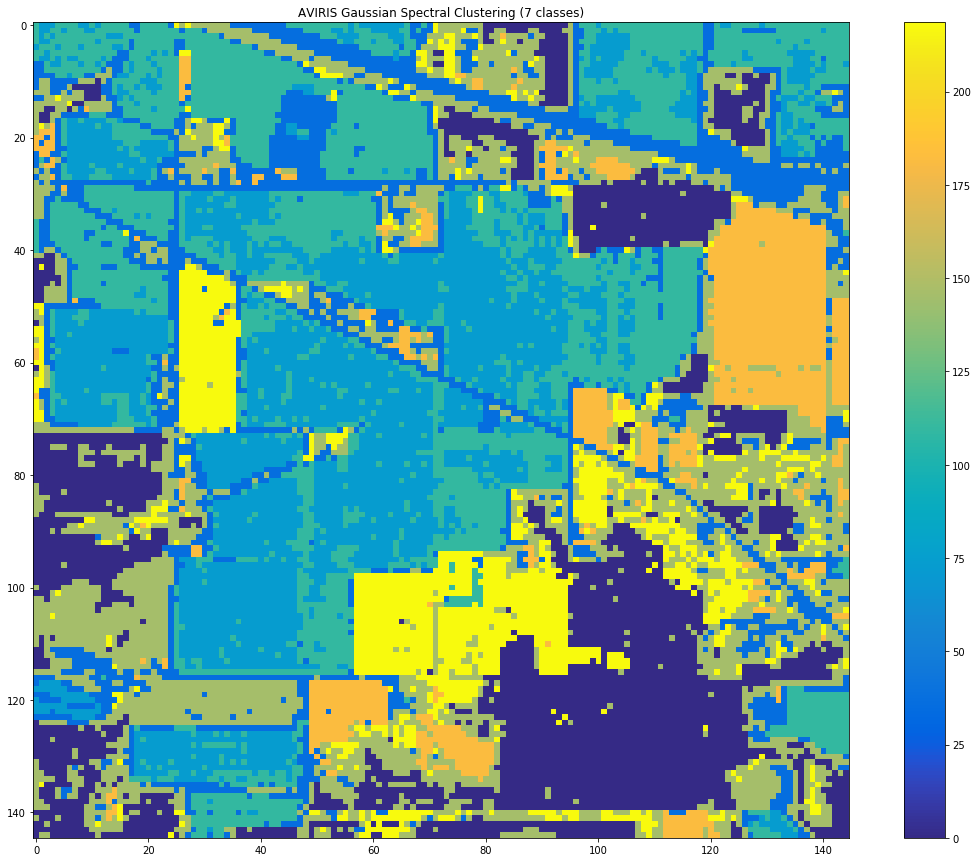

In [15]:
#fig, axs = plt.subplots(nrows=10, ncols=1);
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))

fig.colorbar(im, ax=axs);

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=num_classes, random_state=12345).fit(hsi_data_mat.transpose())

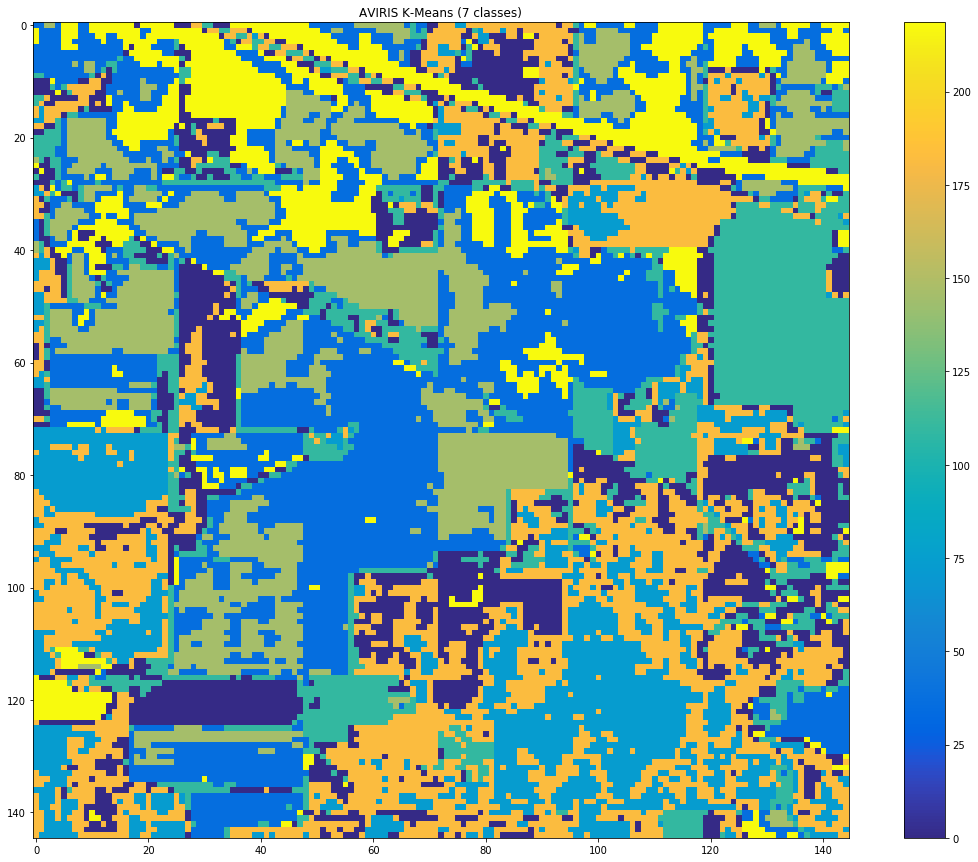

In [18]:
#fig, axs = plt.subplots(nrows=10, ncols=1);
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow(km.labels_.reshape([nl, ns], order='F') * 255/num_classes, cmap=cmap);
#im = axs.imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
fig.colorbar(im, ax=axs);

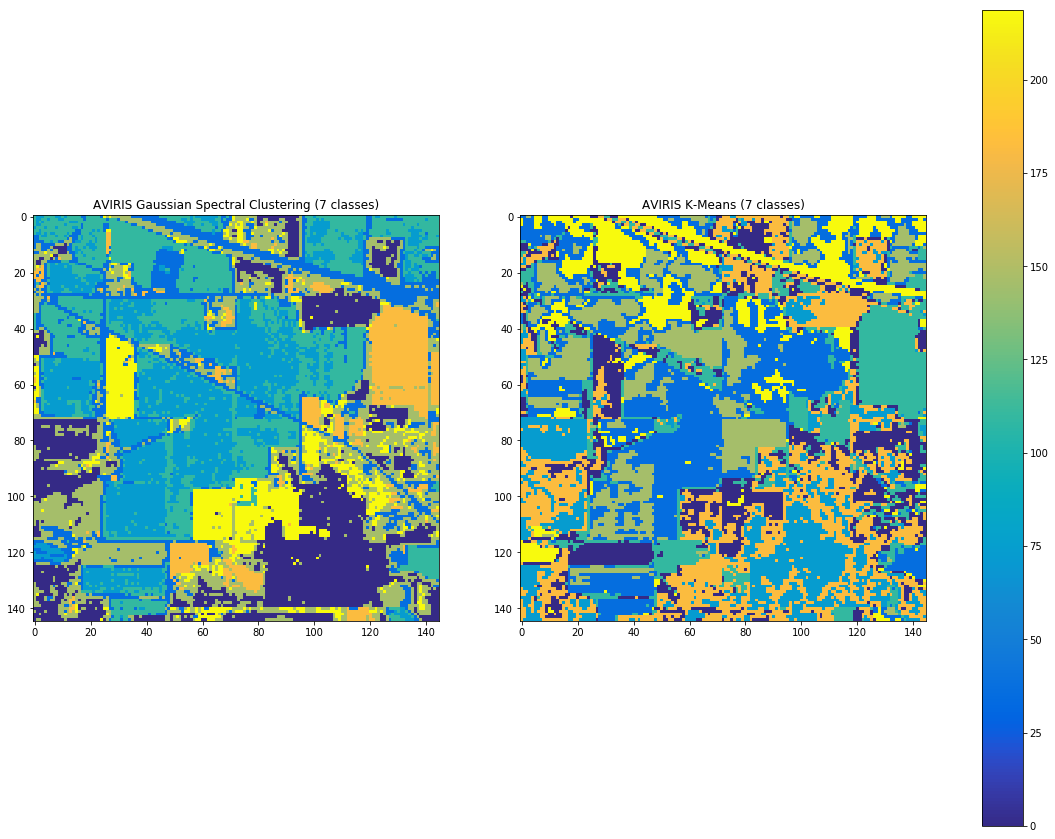

In [19]:
# Side by side comparison
fig, axs = plt.subplots(nrows=1, ncols=2);
cmap = plt.get_cmap('parula')

gsc_im = axs[0].imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
km_im = axs[1].imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);

axs[0].set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))
axs[1].set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(gsc_im, ax=axs);